<a href="https://colab.research.google.com/github/amanp27/Sentiment-Analysis-Project-Movie-Reviews-/blob/main/Movie_Reviews_Project(A1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Sentiment Analyis Project on IMdB rating Movie Reviews**

Our goal is to find which machine learning model is best suited to predict sentiment (output) given a movie review (input).

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import nltk                         #Natural Language ToolKit
nltk.download ("stopwords")
from nltk.corpus import stopwords   #corpus is collection of text documents


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Data Collection**

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Movie Reviews/IMDB Dataset.csv")

In [ ]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
df.tail()

,review,sentiment
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative
49999,No one expects the Star Trek movies to be high...,negative


In [ ]:
df.shape

(50000, 2)

In [ ]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [ ]:
df["sentiment"].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

This dataset contains 50000 rows; however, to train our model faster in the following steps, we’re going to take a smaller sample of 5000 rows. This small sample will contain positive and negative reviews to make the data imbalanced

In [ ]:
#we have take the random 5000 sample data for our project
df1 = df.sample(5000)

<Axes: xlabel='count', ylabel='sentiment'>

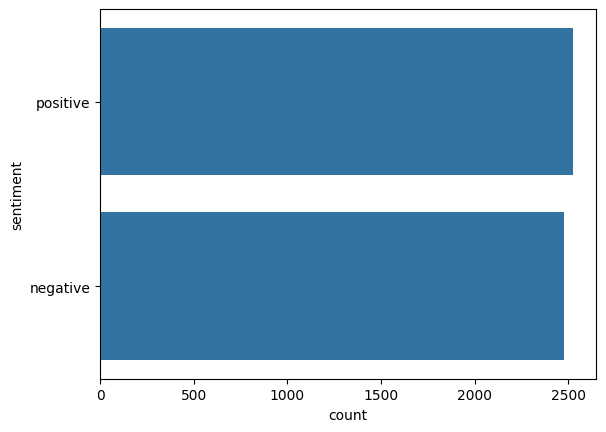

In [ ]:
sns.countplot(df1["sentiment"])

In [ ]:
df1.shape

(5000, 2)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 3497 to 38970
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     5000 non-null   object
 1   sentiment  5000 non-null   object
dtypes: object(2)
memory usage: 117.2+ KB


## **Data Cleaning**

In [ ]:
#removing stopwords from the data.  (stopwords are- "a", "an", "the","in", "on", "at", "with", etc.)
def clean_review(review):
  str = ' '.join(word for word in review.split() if word.lower() not in stopwords.words('english'))   #stopwords removed
  return str

In [ ]:
df1["review"] = df1["review"].apply(clean_review)

In [ ]:
df1["review"]

3497     watching movie one usual time, real real late ...
15279    Terrible acting, lame plot, stupid story aroun...
48215    Oh disappointment movie is. can't believe dire...
33164    SPOILERS often, Hollywood's Shakespeare adapta...
1142     going useless comment ever put down, yet must ...
                               ...                        
12528    admit low expectations movie. surprised find e...
7089     bought back, massive martial arts movie phase....
26722    single woman 40, found film extremely insultin...
28441    movie one worst ones year. main characters che...
38970    I'm glad taped film came BBC last month! blew ...
Name: review, Length: 5000, dtype: object

In [ ]:
#removing html codes from the dataset as a part of data cleaning
import re
def clean_html(text):
  clean = re.compile("<.*?>")
  return re.sub(clean, '', text)

In [ ]:
df1["review"] = df1["review"].apply(clean_html)

In [ ]:
df1["review"]

3497     watching movie one usual time, real real late ...
15279    Terrible acting, lame plot, stupid story aroun...
48215    Oh disappointment movie is. can't believe dire...
33164    SPOILERS often, Hollywood's Shakespeare adapta...
1142     going useless comment ever put down, yet must ...
                               ...                        
12528    admit low expectations movie. surprised find e...
7089     bought back, massive martial arts movie phase....
26722    single woman 40, found film extremely insultin...
28441    movie one worst ones year. main characters che...
38970    I'm glad taped film came BBC last month! blew ...
Name: review, Length: 5000, dtype: object

In [ ]:
from wordcloud import WordCloud

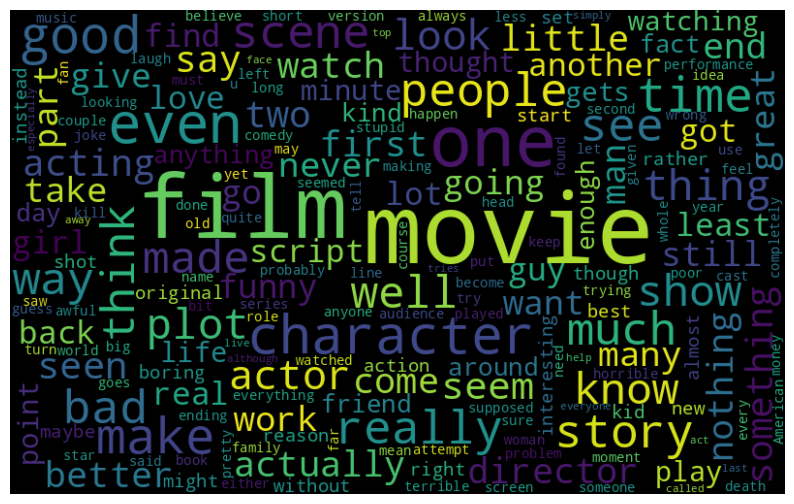

In [ ]:
reviews = ' '.join(word for word in df1["review"][df1["sentiment"] == "negative"])
wordcloud = WordCloud(height=500, width=800, max_font_size=100)
plt.figure(figsize= (10,15))
plt.imshow(wordcloud.generate(reviews), interpolation="bilinear")
plt.axis('off')
plt.show()

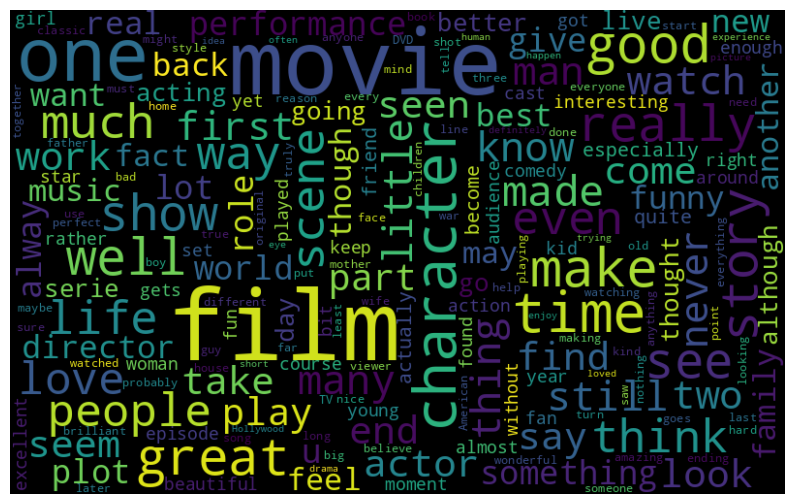

In [ ]:
reviews = ' '.join(word for word in df1["review"][df1["sentiment"] == "positive"])
wordcloud = WordCloud(height=500, width=800, max_font_size=100)
plt.figure(figsize= (10,15))
plt.imshow(wordcloud.generate(reviews), interpolation="bilinear")
plt.axis('off')
plt.show()

## **Data Pre-Processing**

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label = LabelEncoder()
df1["sentiment"] = label.fit_transform(df1["sentiment"])

In [ ]:
df1['sentiment'].value_counts()    #positive=1 & negative=0

sentiment
1    2523
0    2477
Name: count, dtype: int64

In [ ]:
df1.head()

,review,sentiment
3497,"watching movie one usual time, real real late ...",1
15279,"Terrible acting, lame plot, stupid story aroun...",0
48215,Oh disappointment movie is. can't believe dire...,0
33164,"SPOILERS often, Hollywood's Shakespeare adapta...",0
1142,"going useless comment ever put down, yet must ...",0


In [ ]:
X = df1["review"]      #Target Variable
y = df1["sentiment"]   #Predicted Variable

- Classifiers and learning algorithms expect numerical feature vectors rather than raw text documents. This is why we need to turn our movie review text into numerical vectors.

- We’ll use bag of words (BOW) since we care about the frequency of the words in text reviews; however, the order of words is irrelevant. Two common ways to represent bag of words are CountVectorizer and Term Frequency, Inverse Document Frequency (TF-IDF)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

- We want to identify unique/representative words for positive reviews and negative reviews, so we’ll choose the TF-IDF. To turn text data into numerical vectors with TF-IDF

In [ ]:
'''Term frequency Inverse document frequency (TFIDF) is a statistical formula to convert text documents into
vectors based on the relevancy of the word.'''
#basically it is a pre-processing technique that converts text into numbers using the bag of words model to create a matrix of TF-IDF features.

cv = TfidfVectorizer(max_features=1000)
X = cv.fit_transform(df1["review"]).toarray()

In [ ]:
X.shape

(5000, 1000)

## **Model Training**

**Splitting data into train and test**

In [ ]:
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import average_precision_score, precision_recall_curve


from sklearn.model_selection import train_test_split


In [ ]:
#Spliting data into train and test as train=75% and test=25%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state= 0)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3750, 1000), (1250, 1000), (3750,), (1250,))

## **Model Selection**

- In our example, our input (review) and output (sentiment) are clearly identified, so we can say we have labeled input and output data; therefore, we’re dealing with supervised learning.

**Naive Bayes Classifier**

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

In [ ]:
clf1 = GaussianNB()
clf2 = MultinomialNB()
clf3 = BernoulliNB()

In [ ]:
clf1.fit(X_train, y_train)
clf2.fit(X_train, y_train)
clf3.fit(X_train, y_train)

In [ ]:
y_pred1 = clf1.predict(X_test)
y_pred2 = clf2.predict(X_test)
y_pred3 = clf3.predict(X_test)

In [ ]:
y_test.shape, y_pred1.shape

((1250,), (1250,))

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import average_precision_score, precision_recall_curve

In [ ]:
print("Gaussian : ", accuracy_score(y_test, y_pred1))
print("Multinomial : ", accuracy_score(y_test, y_pred2))
print("Bernoulli : ", accuracy_score(y_test, y_pred3))

Gaussian :  0.8096
Multinomial :  0.8408
Bernoulli :  0.8392



- A confusion matrix is a table that allows visualization of the performance of an algorithm. This table typically has two rows and two columns that report the number of false positives, false negatives, true positives, and true negatives

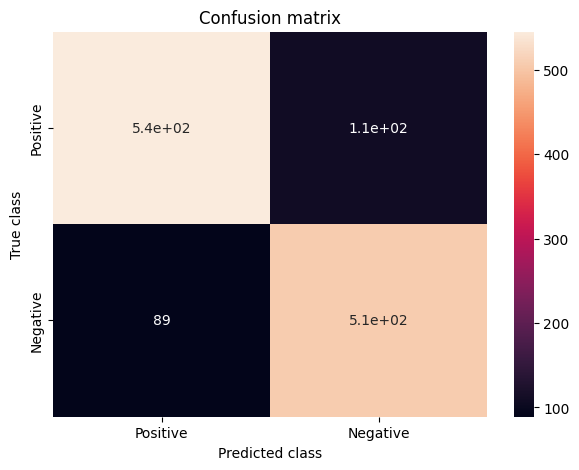

In [ ]:
LABELS = ['Positive', 'Negative']

conf_matrix = confusion_matrix(y_test, y_pred2)
plt.figure(figsize =(7, 5))
sns.heatmap(conf_matrix, xticklabels = LABELS, yticklabels = LABELS, annot = True)
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [ ]:
conf_matrix

array([[545, 110],
       [ 89, 506]])

**Accuracy Scores of Naive Bayes**

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [ ]:
precision_score = precision_score(y_test, y_pred2)
f1_score = f1_score(y_test, y_pred2)
roc_auc_score = roc_auc_score(y_test, y_pred2)

In [ ]:
print('Precision Score:',precision_score)
print('F1 Score:',f1_score)
print("ROC-AUC Score:",roc_auc_score)

Precision Score: 0.8214285714285714
F1 Score: 0.8356729975227085
ROC-AUC Score: 0.8412406183847585


**SVM(Support Vector Machine)**

- GridSearchCV- This is technique consists of an exhaustive search on specified parameters in order to obtain the optimum values of hyperparameters.

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [ ]:
#SVM without tunning hyper parameter
classifier = SVC(kernel = 'linear', random_state=0)
SVC_model = classifier.fit(X_train, y_train)
print('Train Accuracy: ', SVC_model.score(X_train, y_train))
print('Test Accuracy: ', SVC_model.score(X_test, y_test))

Train Accuracy:  0.9114666666666666
Test Accuracy:  0.8408


In [ ]:
#we will use a grid search to find the best parameters for this model to find the best test accuracy
parameters =  {'C':[1, 10, 100, 1000],
              'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
              'gamma':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}

grid_search = GridSearchCV(SVC(random_state=0), parameters, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=0), n_jobs=-1,
             param_grid={'C': [1, 10, 100, 1000],
                         'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [ ]:
print('Train Score: ', grid_search.score(X_train, y_train))
print('Test Score: ', grid_search.score(X_test, y_test))

Train Score:  0.9786666666666667
Test Score:  0.8536


In [ ]:
grid_search.best_params_

{'C': 1, 'gamma': 0.9, 'kernel': 'rbf'}

In [ ]:
classifier = SVC(kernel = 'rbf', gamma = 0.9)
SVC_model = classifier.fit(X_train, y_train)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8536

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [ ]:
precision_score = precision_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)
roc_auc_score = roc_auc_score(y_test, y_pred)

In [ ]:
print('Precision Score:',precision_score)
print('F1 Score:',f1_score)
print("ROC-AUC Score:",roc_auc_score)

Precision Score: 0.8280254777070064
F1 Score: 0.8503679476696648
ROC-AUC Score: 0.8545320418243634


- Precision score is a metric used to evaluate the accuracy of predictions for imbalanced classification problems. It's a measure of how often positive predictions are correct.
Precision is calculated by dividing the number of correct positive predictions (true positives) by the total number of instances the model predicted as positive. Precision can be measured on a scale of 0 to 1 or as a percentage. A higher precision is better, with a perfect precision of 1.0 when the model is always right.

- The ROC AUC score is the area under the ROC curve. It sums up how well a model can produce relative scores to discriminate between positive or negative instances across all classification thresholds. The ROC AUC score ranges from 0 to 1, where 0.5 indicates random guessing, and 1 indicates perfect performance.

- F1 Score is the weighted average of Precision and Recall. Accuracy is used when the True Positives and True negatives are more important while F1-score is used when the False Negatives and False Positives are crucial. Also, F1 takes into account how the data is distributed, so it’s useful when you have data with imbalance classes

- A confusion matrix is a table that allows visualization of the performance of an algorithm. This table typically has two rows and two columns that report the number of false positives, false negatives, true positives, and true negatives

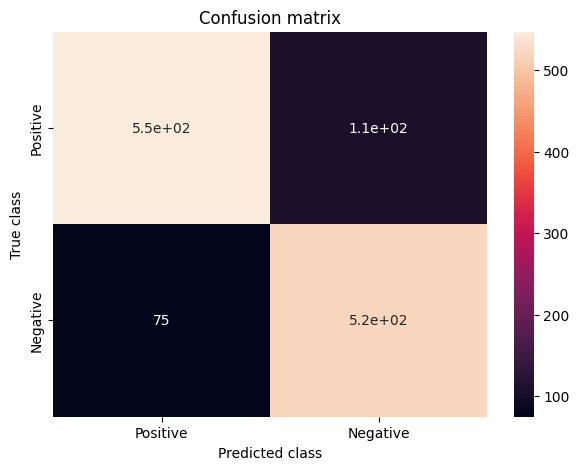

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
LABELS = ['Positive', 'Negative']

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize =(7, 5))
sns.heatmap(conf_matrix, xticklabels = LABELS, yticklabels = LABELS, annot = True)
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [ ]:
conf_matrix

array([[547, 108],
       [ 75, 520]])

**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

In [ ]:
#number of trees in random forest
n_estimators = [20, 40, 60, 80]
#number of features consider at every split
max_features = ['auto', 'sqrt']
#max number of leaves in tree
max_depth = [2, 4]
#minimum number of samples required to split a node
min_samples_split = [2, 5]
#method of selecting samples for training each tree
bootstrap = [True, False]

In [ ]:
param_grid = {'n_estimators': n_estimators, 'max_features': max_features,
              'max_depth': max_depth, 'min_samples_split': min_samples_split,
              'bootstrap': bootstrap}

print(param_grid)

{'n_estimators': [20, 40, 60, 80], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'bootstrap': [True, False]}


In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf_grid = GridSearchCV(estimator = rf, param_grid = param_grid,
                       cv= 5, verbose = 2, n_jobs = -1)

In [ ]:
rf_grid.fit(X_train, y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_split': [2, 5],
                         'n_estimators': [20, 40, 60, 80]},
             verbose=2)

In [ ]:
rf_grid.best_params_

{'bootstrap': True,
 'max_depth': 4,
 'max_features': 'auto',
 'min_samples_split': 5,
 'n_estimators': 80}

In [ ]:
rf_grid.best_score_

0.7957333333333334

In [ ]:
y_pred = rf_grid.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7912

**Accuracy Scores of Random Forest**

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [ ]:
precision_score = precision_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)
roc_auc_score = roc_auc_score(y_test, y_pred)

In [ ]:
print('Precision Score:',precision_score)
print('F1 Score:',f1_score)
print("ROC-AUC Score:",roc_auc_score)

Precision Score: 0.7441520467836257
F1 Score: 0.7959343236903831
ROC-AUC Score: 0.7941433061774328


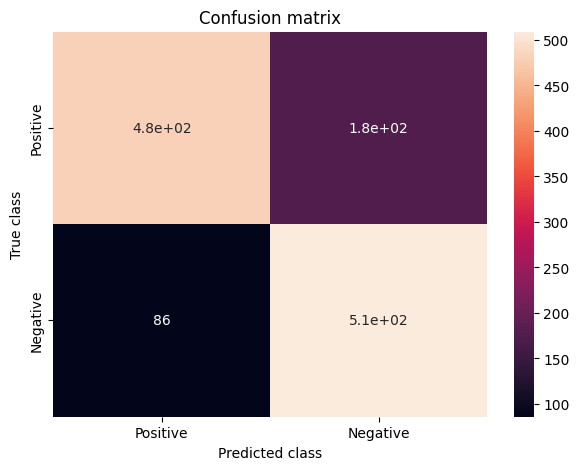

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
LABELS = ['Positive', 'Negative']

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize =(7, 5))
sns.heatmap(conf_matrix, xticklabels = LABELS, yticklabels = LABELS, annot = True)
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [ ]:
conf_matrix

array([[480, 175],
       [ 86, 509]])

## **Conclusion**

- Here you can notice that we have used different Machine Learning model and algorithms to recognize the pattern in data and make predictions.

- These models can be trained to adapt to individual user preferences and needs. This makes it possible to deliver personalized experiences and targeted recommendations in a variety of areas.

- In this project we have Define the Problem: ...
Understand the Data: ...
Consider Model Complexity: ...
Evaluate Performance Metrics: ...
Cross-Validation and Model Evaluation: ...
Experiment with Multiple Models:

As you can see the mean accuracy of our respective models are-

- Naive Bayes - 0.8408
- SVM - 0.8536
- Random Forest - 0.7957333333333334

As from the above results, SVM(Support Vector Machine) has the best accuracy score.
Therefore, we can use SVM model algorithm to make prediction for better outcomes.